In [4]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [5]:
TRAIN_FILE = "./data/train/train.csv"
TEST_PATH = "./data/test/test.csv"

train_set = pd.read_csv(TRAIN_FILE)
test_set = pd.read_csv(TRAIN_FILE)
X_train = train_set['message']
y_train = train_set['code']
X_test = test_set['message']
y_test = test_set['code']

## Adam solver, 64 units in LSTM, 32 batchsize

In [22]:
# tokenize the texts
tokenizer = Tokenizer(
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

# pad the sequences
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# one-hot encode the labels
categorical_labels = to_categorical(y_train)

# define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(2, activation='softmax'))

Epoch 1/3
100/100 [==============================] - 7009s 70s/step - loss: 0.4068 - accuracy: 0.8144
Epoch 2/3
100/100 [==============================] - 9286s 93s/step - loss: 0.0553 - accuracy: 0.9803
Epoch 3/3
100/100 [==============================] - 8634s 85s/step - loss: 0.0187 - accuracy: 0.9956


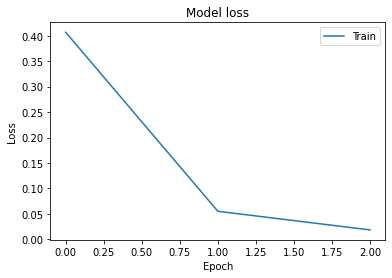

In [23]:
  
# train the model and save the history
history = model.fit(padded_sequences, categorical_labels, epochs=3, batch_size=32)

# plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

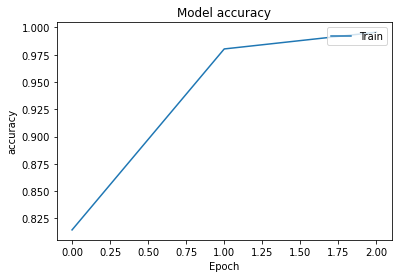

In [24]:
# plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

In [25]:
model.save('./models/NN/3_epochs/')

INFO:tensorflow:Assets written to: ./models/NN/3_epochs/assets


INFO:tensorflow:Assets written to: ./models/NN/3_epochs/assets


In [26]:
from sklearn.metrics import f1_score

# Tokenize the test messages
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length)
test_categorical_labels = to_categorical(y_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded_sequences, test_categorical_labels, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

y_pred = model.predict(test_padded_sequences)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_categorical_labels, axis=1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

Test Loss: 0.011105231009423733
Test Accuracy: 0.9987499713897705
F1 score: 0.9987654320987654


## With fewer neurons and simpler activation function to reduce processing time

### 1 epochs

In [28]:
# define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_length))
model.add(LSTM(16)) # 16 units in LSTM layer
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # sgd optimizer

In [ ]:
model.fit(padded_sequences, categorical_labels, epochs=1, batch_size=32)
model.save('./models/NN/1_epochs_16units/')

### Process to repeat

In [44]:
# Load the saved model
loaded_model = load_model("./models/NN/1_epochs_16units/")
initial_epoch = 1

# Train the model for additional epochs
loaded_model.fit(padded_sequences, categorical_labels, epochs=2, batch_size=32, initial_epoch=initial_epoch)

Epoch 2/2
 55/100 [===============>..............] - ETA: 43:21 - loss: 0.6929 - accuracy: 0.5159

In [2]:
# Tokenize the test messages
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length)
test_categorical_labels = to_categorical(y_test)

# Evaluate the model
test_loss, test_acc = loaded_model.evaluate(test_padded_sequences, test_categorical_labels, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

y_pred = loaded_model.predict(test_padded_sequences)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_categorical_labels, axis=1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

NameError: name 'tokenizer' is not defined

In [32]:
model.save('./models/NN/2_epochs_16units/')

INFO:tensorflow:Assets written to: ./models/NN/1_epochs_16units/assets


INFO:tensorflow:Assets written to: ./models/NN/1_epochs_16units/assets


## Back to adam optimizer, 32 units in LSTM and increase batchsize to 64

In [6]:
# tokenize the texts
tokenizer = Tokenizer(
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

# pad the sequences
max_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# one-hot encode the labels
categorical_labels = to_categorical(y_train)

# define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=32, input_length=max_length))
model.add(LSTM(32))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
  
# train the model and save the history
model.fit(padded_sequences, categorical_labels, epochs=1, batch_size=64)

50/50 [==============================] - 2894s 58s/step - loss: 0.5989 - accuracy: 0.6978


In [8]:
model.save('./models/NN/1_epochs_32units_64batch_adam/')

INFO:tensorflow:Assets written to: ./models/NN/1_epochs_32units_64batch_adam/assets


INFO:tensorflow:Assets written to: ./models/NN/1_epochs_32units_64batch_adam/assets


In [10]:
# Tokenize the test messages
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length)
test_categorical_labels = to_categorical(y_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded_sequences, test_categorical_labels, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

y_pred = model.predict(test_padded_sequences)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_categorical_labels, axis=1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

Test Loss: 0.27537038922309875
Test Accuracy: 0.9409375190734863
F1 score: 0.9393647738209817


### To repeat for epochs

In [11]:
# Load the saved model
# model = load_model('./models/NN/1_epochs_32units_64batch_adam/')
initial_epoch = 1

# Train the model for additional epochs
model.fit(padded_sequences, categorical_labels, epochs=2, batch_size=64, initial_epoch=initial_epoch)

Epoch 2/2
50/50 [==============================] - 3623s 73s/step - loss: 0.1419 - accuracy: 0.9584


In [13]:
# Tokenize the test messages
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length)
test_categorical_labels = to_categorical(y_test)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_padded_sequences, test_categorical_labels, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Test Loss: 0.12648123502731323
Test Accuracy: 0.9559375047683716


In [15]:
y_pred = model.predict(test_padded_sequences)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(test_categorical_labels, axis=1)
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

F1 score: 0.9558132246944532


In [16]:
model.save('./models/NN/2_epochs_32units_64batch_adam/')

INFO:tensorflow:Assets written to: ./models/NN/2_epochs_32units_64batch_adam/assets


INFO:tensorflow:Assets written to: ./models/NN/2_epochs_32units_64batch_adam/assets
